# Import all necessary packages required

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random 

import torch
import torchvision
# import torchvision.transforms as transforms
import torch.nn as nn
import torch.nn.functional as F  
from torchvision import transforms,datasets

from torch.utils.data import Dataset, TensorDataset, DataLoader


# Ensure the availability of Cuda

In [2]:
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")

In [3]:
device

device(type='cuda')

# Dataset Preparation

The primary task is to fetch the data. Here we use the MNIST dataset which contains 70,000 images of handwritten digits. The data we fetch is not natively in tensor and so we need to convert it to that. So we'll be doing transforms.ToTensor() here. Let's go ahead and split them into train and test. Always remember that the test set is a new sample that the model has never seen before. Refer this for normalisation: https://discuss.pytorch.org/t/normalization-in-the-mnist-example/457/11. 

In [4]:
train_transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])
test_transform = transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.1307,),(0.3081,))])

In [5]:
train = datasets.MNIST("",train=True,download=True,transform=train_transform)
test = datasets.MNIST("",train=False,download=True,transform=test_transform)

  0%|          | 0/9912422 [00:00<?, ?it/s]

Extracting MNIST/raw/train-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/28881 [00:00<?, ?it/s]

Extracting MNIST/raw/train-labels-idx1-ubyte.gz to MNIST/raw



  0%|          | 0/1648877 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-images-idx3-ubyte.gz to MNIST/raw



  0%|          | 0/4542 [00:00<?, ?it/s]

Extracting MNIST/raw/t10k-labels-idx1-ubyte.gz to MNIST/raw



/usr/local/lib/python3.7/dist-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [6]:
trainset = torch.utils.data.DataLoader(train,batch_size=2,shuffle=True)
testset = torch.utils.data.DataLoader(test,batch_size=2,shuffle=True)

# Verify if the data fetch was successful 

In [7]:
for data in trainset:
  print(data)
  break


[tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]],


        [[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242]]]]), tensor([3, 6])]


In [8]:
x,y = data[0][0],data[1][0]

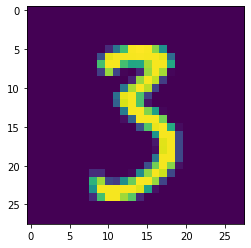

In [9]:
plt.imshow(x.view(28,28))

In [10]:
y

tensor(3)

We can see that the data and the label has loaded successfully. We can continue to the next step. We used view here which is similar to reshape in numpy. Note the shape intially is (1,28,28) so we reshape to (28,28) to view the image. 


# Create the random MNIST Dataset ( Using classes )

In [11]:
class MNISTDataset(Dataset):
  def __init__(self,mnistdataset):
    self.mnistdataset = mnistdataset
 
  def __getitem__(self,index):
    image = self.mnistdataset[index][0]
    label = self.mnistdataset[index][1]
    random_number = random.randint(0,9)
    
    one_hot_random_number = torch.nn.functional.one_hot(torch.arange(0,10))

    sum = label + random_number
    return image,label,one_hot_random_number[random_number],sum

  def __len__(self):
    return len(self.mnistdataset)

In [12]:
train_dataset = MNISTDataset(train)
test_dataset = MNISTDataset(test)

We already have our train and test dataset. We need the loaders below to help us iterate through the dataset. We use shuffle so that the data is different and not all of a single type, this way the model doesn't ending up recognising only one kind of data as and when it is fed. 

In [13]:
train_loader = DataLoader(train_dataset,batch_size=128,shuffle=True)
test_loader = DataLoader(test_dataset,batch_size=128,shuffle=True)

In [14]:
data_iterator = iter(train_loader)
images,labels,randomnumbers,sum = data_iterator.next()

print("Sum:",sum)
print("Images:",images)
print("Labels:",labels)
print("Random Numbers:",randomnumbers)

print("\n")
print("************")
print("Sum:",sum)
print("Images:",images)
print("Labels:",labels)
print("Random Numbers:",randomnumbers)




Sum: tensor([ 8, 13, 14, 15, 13,  4,  6,  6,  7, 10,  9,  9,  6,  7,  0, 17, 15, 13,
        14, 11,  8, 15, 16, 11,  8,  9,  6,  9,  1, 10,  5,  6,  9, 10, 16,  7,
        16, 11, 16, 10,  8,  8,  5, 11,  6,  3,  8, 11,  4, 10, 17, 17, 14, 15,
         5,  8,  8,  7,  9,  8,  4, 14, 11, 15, 11,  9,  9,  6,  6, 12,  6, 10,
         7, 11, 15, 12, 14,  6,  9, 10,  8, 15,  5,  8, 14,  8,  3,  9, 13, 17,
        11, 13, 12,  9, 14, 15, 12, 11,  4,  2,  4,  6,  8, 10,  4,  4, 13,  7,
         7, 11,  8, 12, 14,  9,  7, 13,  4, 12,  9, 17, 10,  7, 10,  6,  1,  7,
        13,  8])
Images: tensor([[[[-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          ...,
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.4242,  ..., -0.4242, -0.4242, -0.4242],
          [-0.4242, -0.4242, -0.424

In [15]:
print('Images:', images.shape)
print('Labels:', labels.shape)
print('Random Numbers:', randomnumbers.shape)
print('Sum:', sum.shape)

Images: torch.Size([128, 1, 28, 28])
Labels: torch.Size([128])
Random Numbers: torch.Size([128, 10])
Sum: torch.Size([128])


In [16]:
print("Number of images ( Train ):",len(train_dataset))
print("Number of images ( Test ):",len(test_dataset))

Number of images ( Train ): 60000
Number of images ( Test ): 10000


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


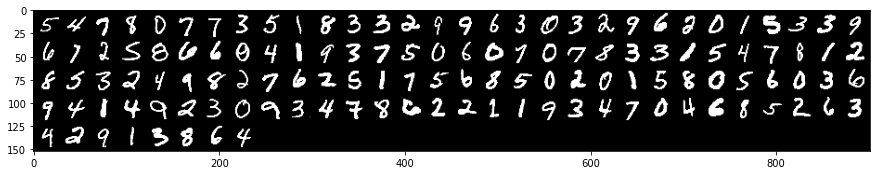

In [17]:
#Source: https://stackoverflow.com/questions/51329159/how-can-i-generate-and-display-a-grid-of-images-in-pytorch-with-plt-imshow-and-t

batch = next(iter(train_loader))   
images,labels,randomnumbers,sum = batch

grid = torchvision.utils.make_grid(images, nrow=30)  
plt.figure(figsize=(15,15))
plt.imshow(np.transpose(grid, (1,2,0)))

To summarise, we first loaded the MNIST dataset. We iterated through it to veriy if it loaded fine. After that we wrote a class which gives us the images, labels, random numbers and the sum. We also used the loader to iterate over these to see how the data looks. This is very important because it gives you a visual representation.

# NETWORK

In [18]:
class Network(nn.Module):
    def __init__(self):
      super().__init__()   #running the initialization for nn.Module
      self.conv1 = nn.Conv2d(1,32,3,padding=1)                                         # input: 28x28x1, output: 28x28x32, RF: 3x3
      self.conv2 = nn.Conv2d(32,64,3,padding=1)                                        # input: 28x28x32, output: 28x28x64, RF: 5x5
      self.pool1 = nn.MaxPool2d(2,2)                                                   # input: 14x14x64, output: 14x14x64, RF: 10x10
      self.conv3 = nn.Conv2d(64,128,3,padding=1)                                       # input: 14x14x64, output: 14x14x128, RF: 12x12
      self.conv4 = nn.Conv2d(128,256,3,padding=1)                                      # input: 14x14x128, output: 14x14x256, RF: 14x14
      self.pool2 = nn.MaxPool2d(2,2)                                                   # input: 7x7x256, output: 7x7x256, RF: 28x28
      self.conv5 = nn.Conv2d(256,512,3)                                                # input: 7x7x256, output: 5x5x512, RF: 30x30
      self.conv6 = nn.Conv2d(512,1024,3)                                               # input: 5x5x512, output: 3x3x1024, RF: 32x32
      self.conv7 = nn.Conv2d(1024,10,3)                                                # input: 3x3x1024, output: 1x1x10, RF: 34x34
 
      self.fc1 = nn.Linear(10+10,128)  #first fully connected layer. (input,output). 
      self.fc2 = nn.Linear(128,19)     #second fully connected layer.

    def forward(self, image, randomno):
      x = self.pool1(F.relu(self.conv2(F.relu(self.conv1(image)))))
      x = self.pool2(F.relu(self.conv4(F.relu(self.conv3(x)))))
      x = F.relu(self.conv6(F.relu(self.conv5(x))))
      x = self.conv7(x)
      x = x.view(-1, 10)
      x1 = torch.cat((x, randomno), dim=1)
      x1 = F.relu(self.fc1(x1))
      x1 = self.fc2(x1) 
      return F.log_softmax(x, dim = 1), F.log_softmax(x1, dim = 1)


We have used ReLU as our activation function over others such as sigmoid or tanh because of the following reasons: 

1.   To achieve a non-linear transformation of the data.
2.   They are simple, easy to calculate, fast to compute, and don't suffer from vanishing     gradients.
3.   It does not activate all the neurons at the same time. i.e neurons will only be deactivated if the output of the linear transformation is less than 0.



In [19]:
model = Network().to(device)
model.eval()

Network(
  (conv1): Conv2d(1, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv2): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool1): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (conv4): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (pool2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv5): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1))
  (conv6): Conv2d(512, 1024, kernel_size=(3, 3), stride=(1, 1))
  (conv7): Conv2d(1024, 10, kernel_size=(3, 3), stride=(1, 1))
  (fc1): Linear(in_features=20, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=19, bias=True)
)

# Model Summary

In [20]:
# Source: https://stackoverflow.com/questions/49201236/check-the-total-number-of-parameters-in-a-pytorch-model
from prettytable import PrettyTable

def count_parameters(model):
    table = PrettyTable(["Modules", "Parameters"])
    total_params = 0
    for name, parameter in model.named_parameters():
        if not parameter.requires_grad: continue
        param = parameter.numel()
        table.add_row([name, param])
        total_params+=param
    print(table)
    print(f"Total Trainable Params: {total_params}")
    return total_params

network = Network()    
count_parameters(network)

+--------------+------------+
|   Modules    | Parameters |
+--------------+------------+
| conv1.weight |    288     |
|  conv1.bias  |     32     |
| conv2.weight |   18432    |
|  conv2.bias  |     64     |
| conv3.weight |   73728    |
|  conv3.bias  |    128     |
| conv4.weight |   294912   |
|  conv4.bias  |    256     |
| conv5.weight |  1179648   |
|  conv5.bias  |    512     |
| conv6.weight |  4718592   |
|  conv6.bias  |    1024    |
| conv7.weight |   92160    |
|  conv7.bias  |     10     |
|  fc1.weight  |    2560    |
|   fc1.bias   |    128     |
|  fc2.weight  |    2432    |
|   fc2.bias   |     19     |
+--------------+------------+
Total Trainable Params: 6384925


6384925

# Train Function

In [21]:
from tqdm import tqdm
def train(model, device, train_loader, optimizer, epoch):
  model.train()
  pbar = tqdm(train_loader)
  for batch_idx, (data, target, randomnumber, sum) in enumerate(pbar):
    data, target, randomnumber, sum = data.to(device), target.to(device), randomnumber.to(device), sum.to(device)
    optimizer.zero_grad()   #we need to explicitly set the gradients to zero to prevent accumulation  
    output, sum_output = model(data,randomnumber.to(device))  # This gives us the predicted label and predicted sum
    loss_mnist = F.nll_loss(output, target)  # Calculate the loss for label. 
    loss_add = F.nll_loss(sum_output, sum)   # Calculate loss for sum of the label and the random number
    loss= loss_mnist + loss_add  # This is the total loss
    loss.backward() # backpropogation
    optimizer.step() # Iterate over all tensors



# Test Function

In [22]:
def test(model,device,test_loader):
  model.eval()
  test_loss = 0
  correct_mnist = 0
  correct_sum = 0
  # turn off gradients during the testing
  with torch.no_grad():
    for (data,target,randomnumber,sum) in test_loader:
      data, target, randomnumber, sum = data.to(device), target.to(device), randomnumber.to(device), sum.to(device)
      output, sum_output = model(data, randomnumber)
      test_loss += F.nll_loss(output, target, reduction='sum').item() + F.nll_loss(sum_output, sum, reduction='sum').item()   # loss of label and random number
      pred_mnist = output.argmax(dim=1, keepdim=True)
      addition_pred = sum_output.argmax(dim=1, keepdim=True)
      pred = output.argmax(dim=1, keepdim=True)
      correct_mnist += pred_mnist.eq(target.view_as(pred_mnist)).sum().item()
      correct_sum += addition_pred.eq(sum.view_as(addition_pred)).sum().item()
  test_loss /= len(test_loader.dataset)

  print('\nTest set: Test loss: {:.4f}, MNIST Accuracy: {}/{} ({:.0f}%), Sum Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct_mnist, len(test_loader.dataset),
        100. * correct_mnist / len(test_loader.dataset),correct_sum,len(test_loader.dataset),100. * correct_sum / len(test_loader.dataset)))


## Training and Logs

In [23]:
import torch.optim as optim
model = Network().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)

epochs = 25
for epoch in range(1, epochs):
    train(model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)

  0%|          | 0/469 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
100%|██████████| 469/469 [00:34<00:00, 13.47it/s]



Test set: Test loss: 2.0773, MNIST Accuracy: 9824/10000 (98%), Sum Accuracy: 3547/10000 (35%)



100%|██████████| 469/469 [00:34<00:00, 13.50it/s]



Test set: Test loss: 0.8698, MNIST Accuracy: 9899/10000 (99%), Sum Accuracy: 9673/10000 (97%)



100%|██████████| 469/469 [00:34<00:00, 13.46it/s]



Test set: Test loss: 0.2501, MNIST Accuracy: 9926/10000 (99%), Sum Accuracy: 9905/10000 (99%)



100%|██████████| 469/469 [00:34<00:00, 13.64it/s]



Test set: Test loss: 0.1339, MNIST Accuracy: 9911/10000 (99%), Sum Accuracy: 9901/10000 (99%)



100%|██████████| 469/469 [00:34<00:00, 13.68it/s]



Test set: Test loss: 0.1180, MNIST Accuracy: 9902/10000 (99%), Sum Accuracy: 9883/10000 (99%)



100%|██████████| 469/469 [00:34<00:00, 13.67it/s]



Test set: Test loss: 0.0736, MNIST Accuracy: 9937/10000 (99%), Sum Accuracy: 9929/10000 (99%)



100%|██████████| 469/469 [00:34<00:00, 13.54it/s]



Test set: Test loss: 0.0666, MNIST Accuracy: 9940/10000 (99%), Sum Accuracy: 9931/10000 (99%)



100%|██████████| 469/469 [00:34<00:00, 13.53it/s]



Test set: Test loss: 0.0654, MNIST Accuracy: 9928/10000 (99%), Sum Accuracy: 9922/10000 (99%)



100%|██████████| 469/469 [00:34<00:00, 13.45it/s]



Test set: Test loss: 0.0542, MNIST Accuracy: 9938/10000 (99%), Sum Accuracy: 9938/10000 (99%)



100%|██████████| 469/469 [00:34<00:00, 13.54it/s]



Test set: Test loss: 0.0645, MNIST Accuracy: 9921/10000 (99%), Sum Accuracy: 9921/10000 (99%)



100%|██████████| 469/469 [00:34<00:00, 13.49it/s]



Test set: Test loss: 0.0562, MNIST Accuracy: 9935/10000 (99%), Sum Accuracy: 9929/10000 (99%)



100%|██████████| 469/469 [00:34<00:00, 13.51it/s]



Test set: Test loss: 0.0608, MNIST Accuracy: 9934/10000 (99%), Sum Accuracy: 9927/10000 (99%)



100%|██████████| 469/469 [00:34<00:00, 13.46it/s]



Test set: Test loss: 0.0518, MNIST Accuracy: 9942/10000 (99%), Sum Accuracy: 9940/10000 (99%)



100%|██████████| 469/469 [00:34<00:00, 13.59it/s]



Test set: Test loss: 0.0492, MNIST Accuracy: 9941/10000 (99%), Sum Accuracy: 9940/10000 (99%)



100%|██████████| 469/469 [00:34<00:00, 13.54it/s]



Test set: Test loss: 0.0485, MNIST Accuracy: 9940/10000 (99%), Sum Accuracy: 9938/10000 (99%)



100%|██████████| 469/469 [00:34<00:00, 13.55it/s]



Test set: Test loss: 0.0492, MNIST Accuracy: 9941/10000 (99%), Sum Accuracy: 9944/10000 (99%)



100%|██████████| 469/469 [00:34<00:00, 13.52it/s]



Test set: Test loss: 0.0482, MNIST Accuracy: 9942/10000 (99%), Sum Accuracy: 9937/10000 (99%)



100%|██████████| 469/469 [00:34<00:00, 13.55it/s]



Test set: Test loss: 0.0470, MNIST Accuracy: 9941/10000 (99%), Sum Accuracy: 9941/10000 (99%)



100%|██████████| 469/469 [00:34<00:00, 13.49it/s]



Test set: Test loss: 0.0467, MNIST Accuracy: 9940/10000 (99%), Sum Accuracy: 9941/10000 (99%)



100%|██████████| 469/469 [00:34<00:00, 13.50it/s]



Test set: Test loss: 0.0461, MNIST Accuracy: 9942/10000 (99%), Sum Accuracy: 9944/10000 (99%)



100%|██████████| 469/469 [00:34<00:00, 13.48it/s]



Test set: Test loss: 0.0492, MNIST Accuracy: 9942/10000 (99%), Sum Accuracy: 9937/10000 (99%)



100%|██████████| 469/469 [00:34<00:00, 13.45it/s]



Test set: Test loss: 0.0496, MNIST Accuracy: 9941/10000 (99%), Sum Accuracy: 9936/10000 (99%)



100%|██████████| 469/469 [00:34<00:00, 13.50it/s]



Test set: Test loss: 0.0478, MNIST Accuracy: 9942/10000 (99%), Sum Accuracy: 9946/10000 (99%)



100%|██████████| 469/469 [00:34<00:00, 13.43it/s]



Test set: Test loss: 0.0486, MNIST Accuracy: 9942/10000 (99%), Sum Accuracy: 9934/10000 (99%)



In [ ]:
test_loss = test(model, device, test_loader)


Test set: Test loss: 0.0451, MNIST Accuracy: 9950/10000 (100%), Sum Accuracy: 9948/10000 (99%)



## Results 

In [34]:
def prediction(image,rnumber):

    rnumber_one_hot_encoding = torch.zeros(11).long()
    rnumber_one_hot_encoding[rnumber] = 1
    rnumber_one_hot_encoding = rnumber_one_hot_encoding[:-1]

    
    output_1,output_2 = model(image.unsqueeze(dim=1).to(device),rnumber_one_hot_encoding.reshape(-1,10).to(device))

    mnist_predicted_label = output_1.argmax(dim=1, keepdim=True)
    sum_predicted = output_2.argmax(dim=1, keepdim=True)

    #print(f"Random Number Generated is {rnum}")
    plt.imshow(image.cpu().numpy().squeeze(),cmap='gray')
    print("MNIST prediction",mnist_predicted_label.item())
    print("Random Number Generated",rnumber)
    print("Sum calculated",sum_predicted.item())
    return mnist_predicted_label, sum_predicted

MNIST prediction 9
Random Number Generated 0
Sum calculated 9


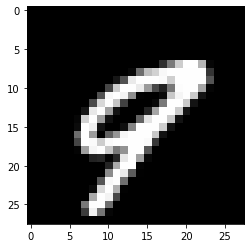

In [35]:
image,_,_,_ = test_dataset[random.randint(1,10000)]
rnum=random.randint(0,9)
mnist_pred, sum_pred =prediction(image,rnum)

MNIST prediction 0
Random Number Generated 9
Sum calculated 9


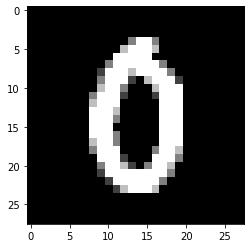

In [36]:
image,_,_,_ = test_dataset[random.randint(1,10000)]
rnum=random.randint(0,9)
mnist_pred, sum_pred =prediction(image,rnum)

MNIST prediction 0
Random Number Generated 6
Sum calculated 6


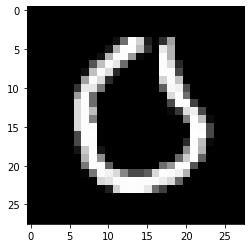

In [37]:

image,_,_,_ = test_dataset[random.randint(1,10000)]
rnum=random.randint(0,9)
mnist_pred, sum_pred =prediction(image,rnum)

MNIST prediction 0
Random Number Generated 3
Sum calculated 3


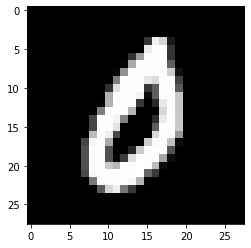

In [38]:
image,_,_,_ = test_dataset[random.randint(1,10000)]
rnum=random.randint(0,9)
mnist_pred, sum_pred =prediction(image,rnum)